In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

# Homework

In [11]:
def MASeries(coeffs, std, nPoints):
    q=len(coeffs)-1
    np.random.seed()
    gaussNoise=np.random.normal(0., std, nPoints+q)
    x = []
    for i in range(q,nPoints+q):
        xNew = coeffs[0]+gaussNoise[i]
        for j in range(1,q+1):
            xNew += coeffs[j] * gaussNoise[i-j]
        x.append(xNew)
    return x

In [12]:
test = MASeries([0., 0.5], 1., 5000)

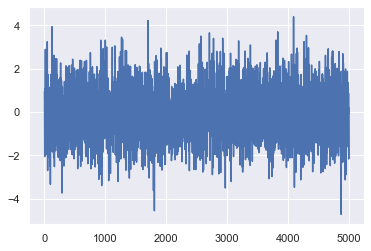

In [13]:
plt.plot(test)
plt.show()

In [14]:
np.var(test)

1.2998635069406963

In [15]:
test2 = MASeries([0., 0.5, 0.2], 1., 5000)

In [16]:
np.var(test2)

1.2475708781382775

In [17]:
1+ 0.5*0.5 + 0.2*.2

1.29

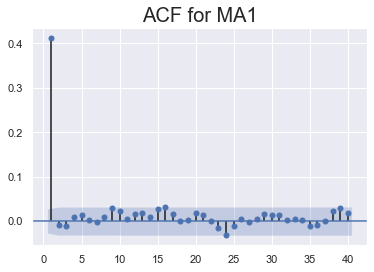

In [19]:
sgt.plot_acf(test, zero=False, lags=40)
plt.title("ACF for MA1", size=20)
plt.show()

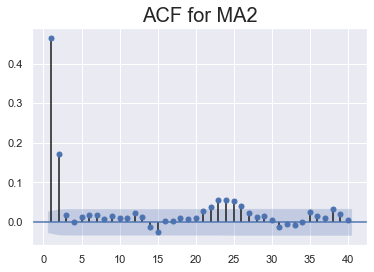

In [20]:
sgt.plot_acf(test2, zero=False, lags=40)
plt.title("ACF for MA2", size=20)
plt.show()

In [21]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [29]:
arparams=np.array([0., 0.])
maparams = np.array([0., .5])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs=5000
np.random.seed(2014)
y = arma_generate_sample(ar, ma, nobs)

In [30]:
np.var(y)

1.2399891393012938

In [31]:
from statsmodels.tsa.arima_process import ArmaProcess

In [36]:
ar = np.array([0., 0.])
ma = np.array([0., .5])
ar = np.r_[1,-ar]
ma = np.r_[1,ma]
ARMA_object = ArmaProcess(ar, ma)
yAnother = ARMA_object.generate_sample(nsample=5000)

In [37]:
np.var(yAnother)

1.2336038899486512

In [48]:
arparams=np.array([0.5, .2])
maparams = np.array([.0])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs=5000
np.random.seed(2014)
ar1 = arma_generate_sample(ar, ma, nobs)

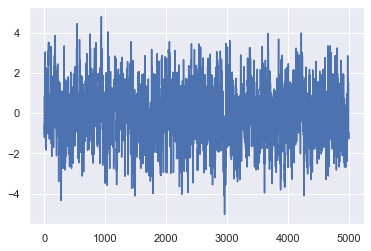

In [49]:
plt.plot(ar1)

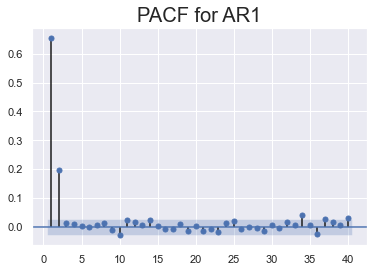

In [50]:
sgt.plot_pacf(ar1, zero=False, lags=40)
plt.title("PACF for AR1", size=20)
plt.show()

In [53]:
arparams=np.array([0, .0])
maparams = np.array([.5, .2])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs=5000
np.random.seed(2014)
ma2 = arma_generate_sample(ar, ma, nobs)

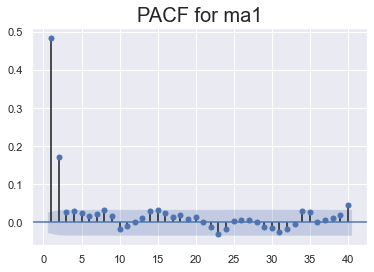

In [54]:
sgt.plot_acf(ma2, zero=False, lags=40)
plt.title("PACF for ma1", size=20)
plt.show()

In [81]:
arparams=np.array([.5, .2])
maparams = np.array([.5])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs=5000
np.random.seed(2014)
example = arma_generate_sample(ar, ma, nobs)

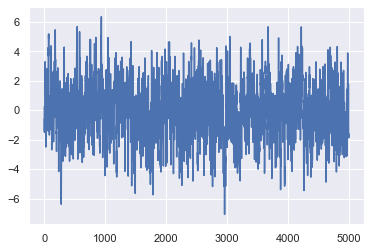

In [82]:
plt.plot(example)

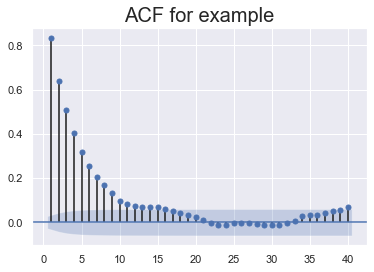

In [83]:
sgt.plot_acf(example, zero=False, lags=40)
plt.title("ACF for example", size=20)
plt.show()

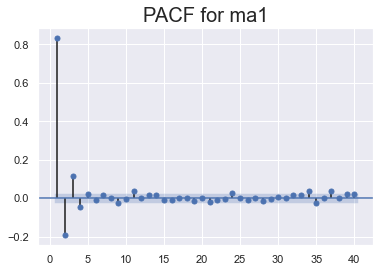

In [84]:
sgt.plot_pacf(example, zero=False, lags=40)
plt.title("PACF for ma1", size=20)
plt.show()

In [85]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [86]:
res=arma_order_select_ic(example, ic=['aic', 'bic'], trend='nc')
res.aic_min_order

(1, 2)

In [87]:
res.bic_min_order

(1, 2)

Jakub's code

{'Len': 5000, 'Mean': 0.02894015339563536, 'Var': 1.8737374561608646}

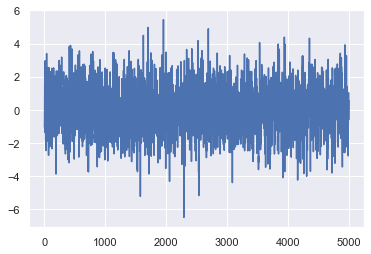

In [121]:
ar = np.array([.3,])
ma = np.array([.5, .2])
ar=np.r_[1,-ar]
ma=np.r_[1,ma]
nobs=5000
np.random.seed=(2014)
ARMA_object = ArmaProcess(ar, ma)
yARMA22 = ARMA_object.generate_sample(nsample=nobs)
plt.plot(yARMA22)
{"Len": len(yARMA22), "Mean": np.mean(yARMA22), "Var": np.var(yARMA22)}

In [122]:
res=arma_order_select_ic(yARMA22, ic=['aic', 'bic'], trend='nc')
res.aic_min_order

(1, 2)

still not working or is it?

In [109]:
model = ARMA(yARMA22, order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(1, 2)   Log Likelihood               -7046.869
Method:                       css-mle   S.D. of innovations              0.990
Date:                Tue, 19 May 2020   AIC                          14103.739
Time:                        18:12:03   BIC                          14136.325
Sample:                             0   HQIC                         14115.159
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.047      0.094      0.925      -0.088       0.097
ar.L1.y        0.5156      0.023     22.557      0.000       0.471       0.560
ma.L1.y        0.4532      0.025     18.233      0.000       0.404       0.502
ma.L2.y        0.1800      0.021      8.546      0.000       0.139       0.221
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9393           +0.0000j            1.9393            0.0000
MA.1           -1.2592           -1.9928j            2.3572           -0.3397
MA.2           -1.2592           +1.9928j            2.3572            0.3397
-----------------------------------------------------------------------------
"""

# PMDarima models

In [113]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [123]:
auto_arima(yARMA22)

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [124]:
auto_arima(yARMA22).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -7101.079
Date:                Tue, 19 May 2020   AIC                          14212.158
Time:                        18:26:16   BIC                          14244.744
Sample:                             0   HQIC                         14223.579
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0186      0.023      0.818      0.413      -0.026       0.063
ar.L1          0.3594      0.034     10.493      0.000       0.292       0.427
ma.L1          0.4368      0.035     12.385      0.000       0.368       0.506
ma.L2          0.1659      0.025      6.573      0.000       0.116       0.215
sigma2         1.0024      0.020     51.223      0.000       0.964       1.041
===================================================================================
Ljung-Box (Q):                       29.49   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.89   Prob(JB):                         0.12
Heteroskedasticity (H):               1.02   Skew:                             0.05
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
stepwise_fit = auto_arima(yARMA22, start_p=0, start_q=0, max_p=4, max_q=4, d=None, trace=True, stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=17333.061, BIC=17346.095, Time=0.079 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=14426.441, BIC=14445.993, Time=0.210 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=14958.158, BIC=14977.710, Time=0.416 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=17333.295, BIC=17339.812, Time=0.037 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=14220.661, BIC=14246.730, Time=0.302 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [intercept=True]; AIC=14220.391, BIC=14252.977, Time=0.462 seconds
Fit ARIMA(4,0,0)x(0,0,0,0) [intercept=True]; AIC=14217.890, BIC=14256.993, Time=0.552 seconds
Fit ARIMA(4,0,1)x(0,0,0,0) [intercept=True]; AIC=14215.623, BIC=14261.243, Time=1.842 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=14215.063, BIC=14254.166, Time=1.916 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=14220.879, BIC=14253.465, Time=0.719 seconds
Fit ARIMA(3,0,2)

In [126]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -7101.079
Date:                Tue, 19 May 2020   AIC                          14212.158
Time:                        18:31:18   BIC                          14244.744
Sample:                             0   HQIC                         14223.579
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0186      0.023      0.818      0.413      -0.026       0.063
ar.L1          0.3594      0.034     10.493      0.000       0.292       0.427
ma.L1          0.4368      0.035     12.385      0.000       0.368       0.506
ma.L2          0.1659      0.025      6.573      0.000       0.116       0.215
sigma2         1.0024      0.020     51.223      0.000       0.964       1.041
===================================================================================
Ljung-Box (Q):                       29.49   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.89   Prob(JB):                         0.12
Heteroskedasticity (H):               1.02   Skew:                             0.05
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Homework,

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [128]:
# model multiplicative and plot
# 